In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_av=pd.read_csv('E:/project3_avocado.csv',parse_dates=['Date'])
df_av=pd.DataFrame(df_av)
df_av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


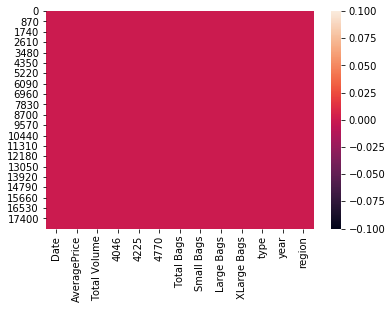

In [3]:
#checking for any missing data
sns.heatmap(df_av.isnull())

In [4]:
df_av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
#We can see there no missing values in the dataset

In [6]:
#checking data types
df_av.dtypes
#We can see most of the data is in numerical form except Type,Region whicha are in categorical form
#And a Date attribute is also present

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [7]:
#checking the basic info about the attributes and their counts
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
#checking the maximum and minimum values of each attribute and their percentiles
df_av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
df_av_dates=pd.DataFrame()

In [10]:
df_av_dates['month']=df_av['Date'].dt.month_name()
df_av_dates['year']=df_av['Date'].dt.year
df_av_dates['day']=df_av['Date'].dt.day_name()
df_av_dates['Total Volume']=df_av['Total Volume']
df_av_dates['AveragePrice']=df_av['AveragePrice']
df_av_dates['4046']=df_av['4046']
df_av_dates['4225']=df_av['4225']
df_av_dates['4770']=df_av['4770']

In [11]:
df_av_dates['Type_of_day']=np.where((df_av_dates['day']=='Sunday')|(df_av_dates['day']=="Saturday"),'weekend','weekday')
df_av_dates

,month,year,day,Total Volume,AveragePrice,4046,4225,4770,Type_of_day
0,December,2015,Sunday,64236.62,1.33,1036.74,54454.85,48.16,weekend
1,December,2015,Sunday,54876.98,1.35,674.28,44638.81,58.33,weekend
2,December,2015,Sunday,118220.22,0.93,794.70,109149.67,130.50,weekend
3,June,2015,Friday,78992.15,1.08,1132.00,71976.41,72.58,weekday
4,November,2015,Sunday,51039.60,1.28,941.48,43838.39,75.78,weekend
...,...,...,...,...,...,...,...,...,...
18244,April,2018,Monday,17074.83,1.63,2046.96,1529.20,0.00,weekday
18245,January,2018,Sunday,13888.04,1.71,1191.70,3431.50,0.00,weekend
18246,January,2018,Sunday,13766.76,1.87,1191.92,2452.79,727.94,weekend
18247,January,2018,Sunday,16205.22,1.93,1527.63,2981.04,727.01,weekend


# Data Visualization

# Bivariate Analysis

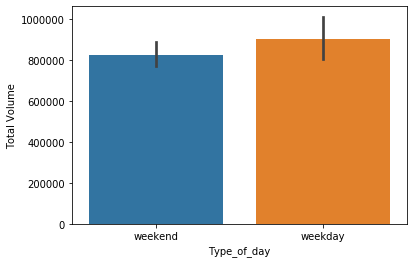

In [12]:
sns.barplot(x='Type_of_day',y='Total Volume',data=df_av_dates)
plt.show()
#higher volume of avocado sold on weekdays

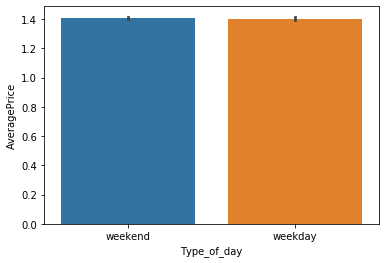

In [13]:
sns.barplot(x='Type_of_day',y='AveragePrice',data=df_av_dates)
plt.show()
#AveragePrice is almost equal irrespective of type of the day

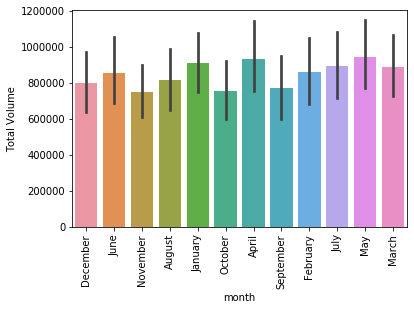

In [14]:
plt.xticks(rotation=90)
sns.barplot(x='month',y='Total Volume',data=df_av_dates)
plt.show()
#Sales is highest in April,May and dips as we go further in the year
#Sales again gradually starts increasing from January

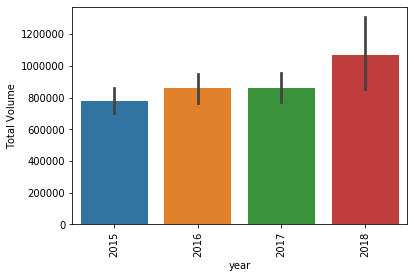

In [15]:
plt.xticks(rotation=90)
sns.barplot(x='year',y='Total Volume',data=df_av_dates)
plt.show()
#Total Volume of avocados sold is increasing yearly from 2015 to 2018

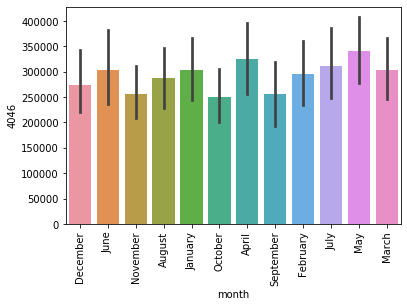

In [16]:
plt.xticks(rotation=90)
sns.barplot(x='month',y='4046',data=df_av_dates)
plt.show()
#Hash avocado with code PRoduct Look Up(PLU) code 4046 is sold highest in May

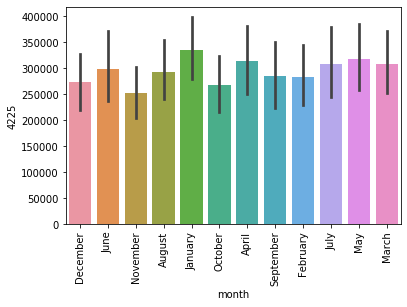

In [17]:
plt.xticks(rotation=90)
sns.barplot(x='month',y='4225',data=df_av_dates)
plt.show()
#Hash avocado with code PRoduct Look Up(PLU) code 4225 is sold highest in January

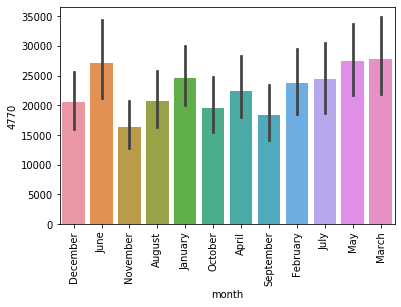

In [18]:
plt.xticks(rotation=90)
sns.barplot(x='month',y='4770',data=df_av_dates)
plt.show()
#Hash avocado with code PRoduct Look Up(PLU) code 4770 is sold highest in March

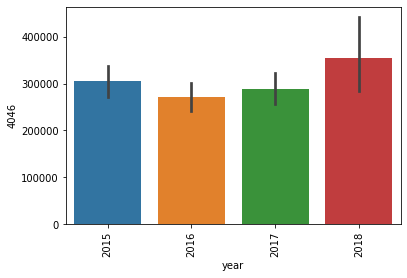

In [19]:
plt.xticks(rotation=90)
sns.barplot(x='year',y='4046',data=df_av_dates)
plt.show()
#Sales of Hash avocado with code PRoduct Look Up(PLU) code 4046 dipped from 2015 to 2016
#But sales has been increasing since then with the highest sales in 2018

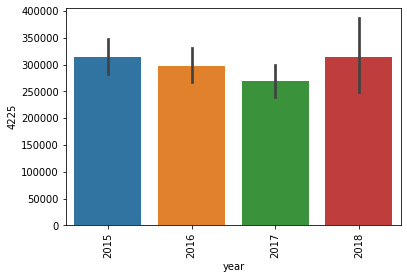

In [20]:
plt.xticks(rotation=90)
sns.barplot(x='year',y='4225',data=df_av_dates)
plt.show()
#Sales of Hash avocado with code PRoduct Look Up(PLU) code 4225 has been dipping from 2015 to 2017
#But sales has been a significant upsurge in 2018

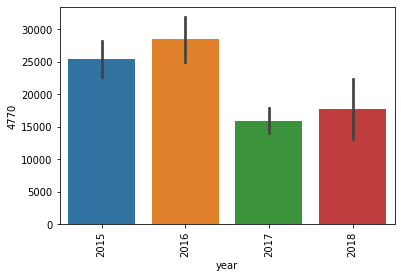

In [21]:
plt.xticks(rotation=90)
sns.barplot(x='year',y='4770',data=df_av_dates)
plt.show()
#Sales of Hash avocado with code PRoduct Look Up(PLU) code 4770 increased in 2016
#But Sales has decreased drastically in 2017
#although we can see a slight increase in 2018

In [22]:
df_av=pd.read_csv('E:/project3_avocado.csv')
df_av=pd.DataFrame(df_av)
df_av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
df_av['Date']=pd.to_datetime(df_av['Date'])
df_av['Month']=df_av['Date'].apply(lambda x:x.month)
df_av['Day']=df_av['Date'].apply(lambda x:x.day)

In [24]:
df_av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [25]:
print(df_av["region"].unique())
print('')
print('Number of unique regions:',len(df_av["region"].unique()))

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']

Number of unique regions: 54


In [26]:
df_av['region'].value_counts()

California             338
HartfordSpringfield    338
DallasFtWorth          338
Tampa                  338
Sacramento             338
HarrisburgScranton     338
Columbus               338
GrandRapids            338
Roanoke                338
NewOrleansMobile       338
Chicago                338
Indianapolis           338
LosAngeles             338
RaleighGreensboro      338
Orlando                338
SouthCarolina          338
SouthCentral           338
Louisville             338
Midsouth               338
Charlotte              338
Albany                 338
Southeast              338
Syracuse               338
Plains                 338
NorthernNewEngland     338
StLouis                338
Northeast              338
Nashville              338
SanDiego               338
BuffaloRochester       338
Philadelphia           338
Spokane                338
Detroit                338
BaltimoreWashington    338
Boston                 338
RichmondNorfolk        338
Denver                 338
W

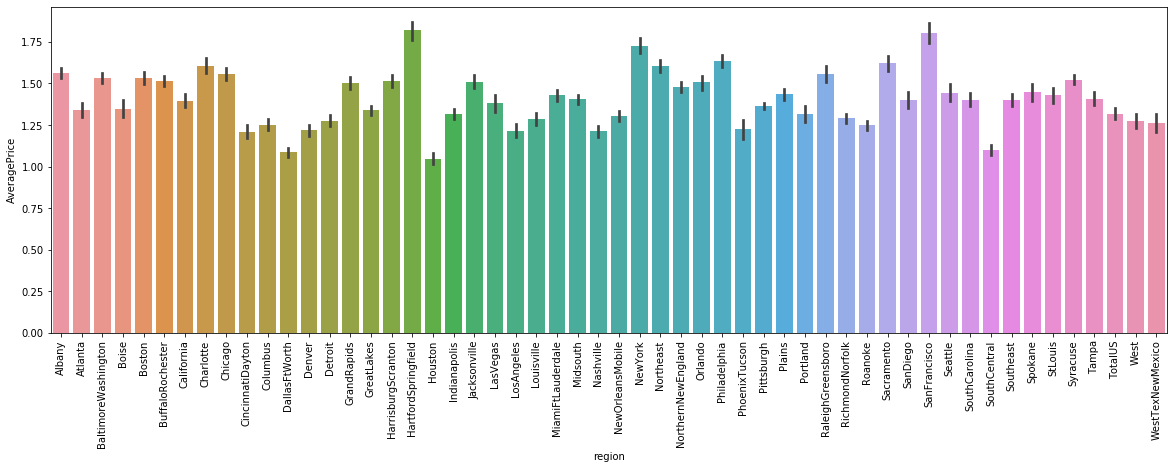

In [27]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='region',y='AveragePrice',data=df_av)
plt.show()
#AveargePrice is highest in SanFrancisco & HartfordSpringfield 
#Lowest in Houston & DallasFtWorth

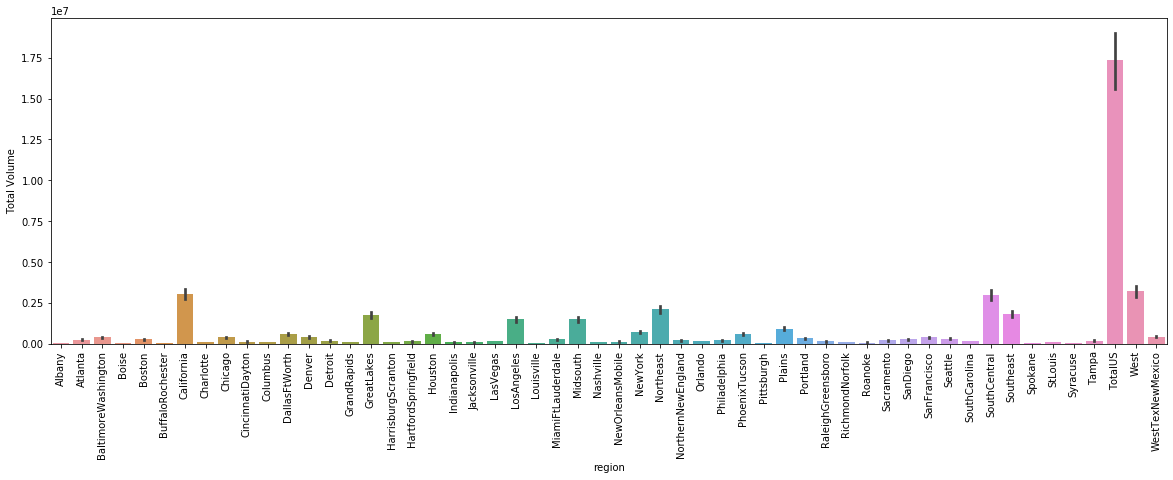

In [28]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='region',y='Total Volume',data=df_av)
plt.show()
#highest volume of avocado sold in West, SouthCentral
#TotalUs consists of higher number of region so not considering it here

In [29]:
df_av['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

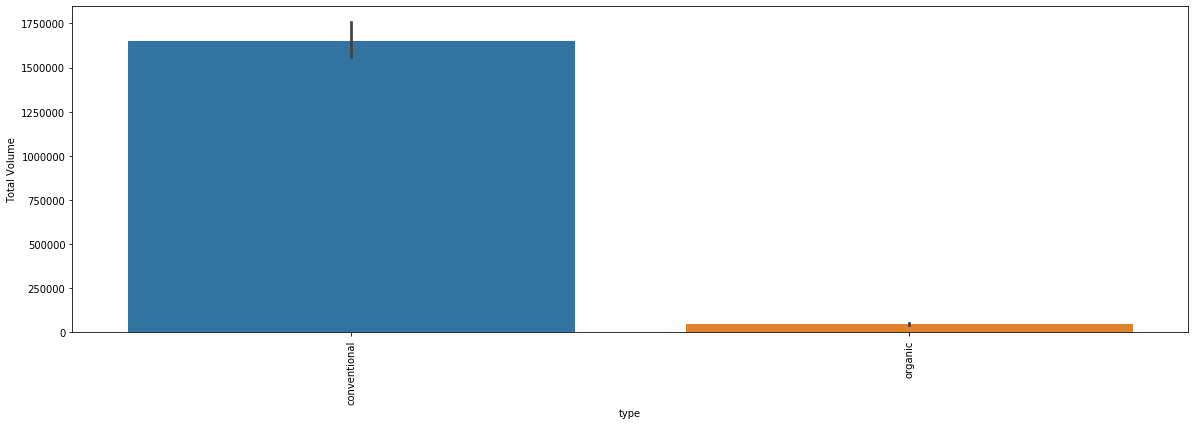

In [30]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='type',y='Total Volume',data=df_av)
plt.show()
#Much higher volume of conventional avocado is sold

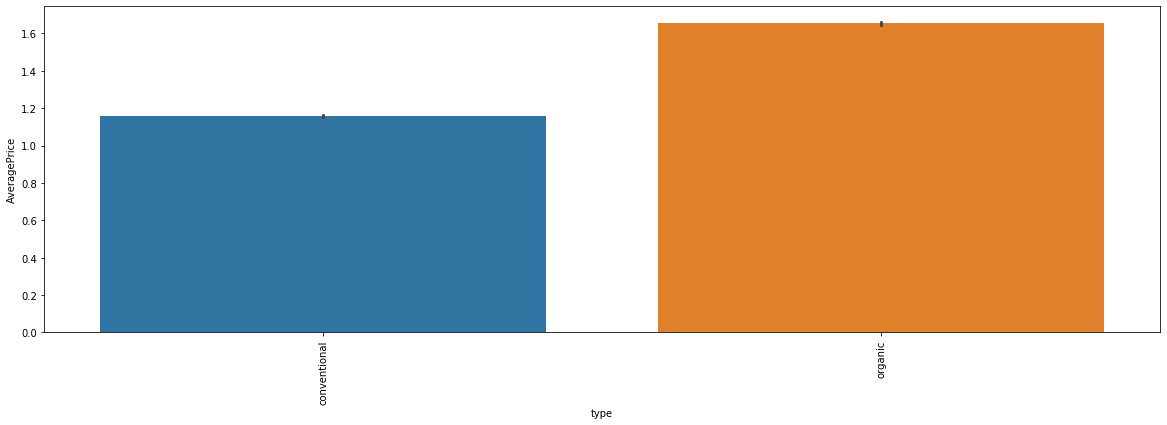

In [31]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='type',y='AveragePrice',data=df_av)
plt.show()
#Organic avocado per unit price is higher than conventional type

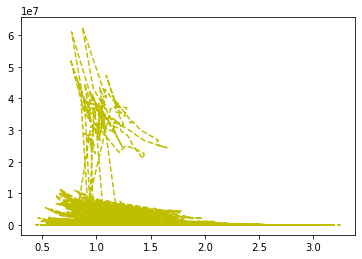

In [32]:
plt.plot(df_av['AveragePrice'],df_av['Total Volume'],"--y")

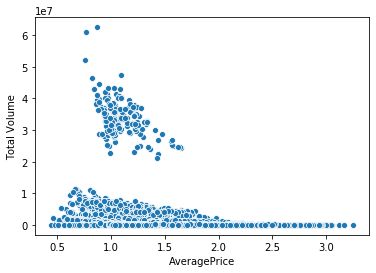

In [33]:
sns.scatterplot(data=df_av,x="AveragePrice",y='Total Volume')

# Univariate Analysis

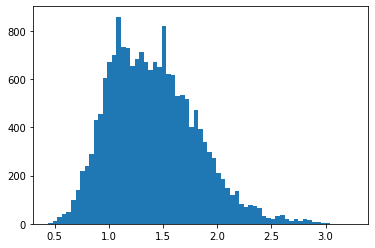

In [34]:
plt.hist(df_av['AveragePrice'],bins = 'auto')
plt.show()

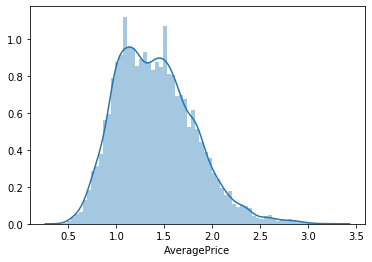

In [35]:
sns.distplot(df_av["AveragePrice"],bins='auto')

In [36]:
#AveragePrice has normally distributed data

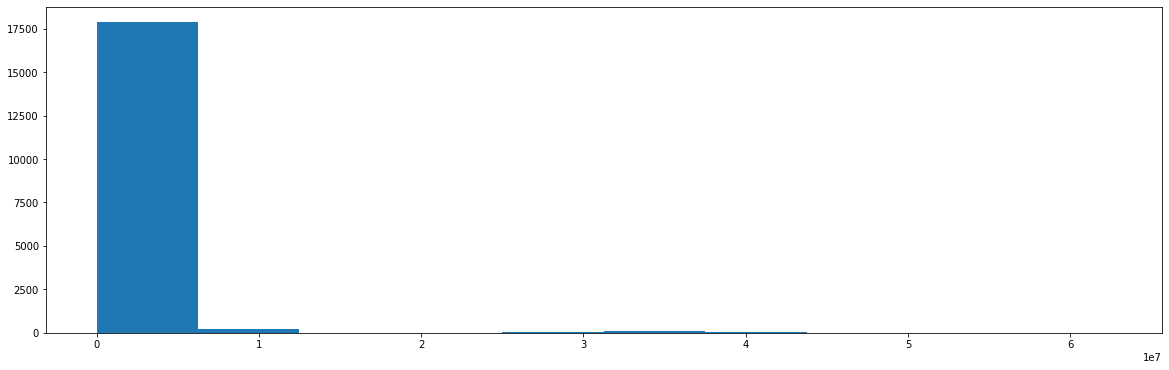

In [37]:
plt.figure(figsize=(20,6))
plt.hist(df_av["Total Volume"],bins=10)
plt.show()

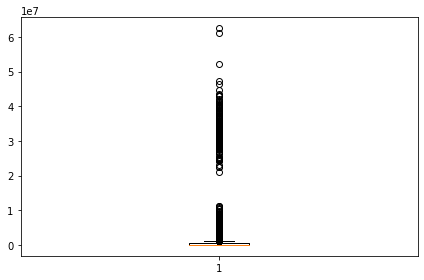

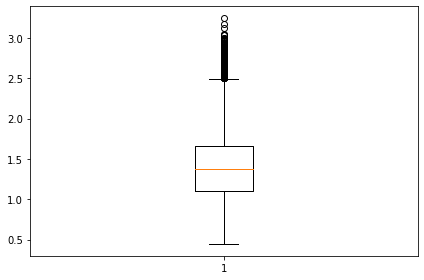

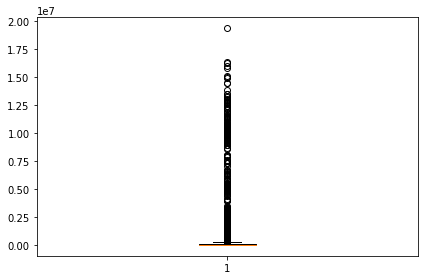

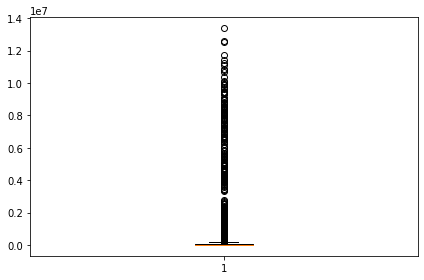

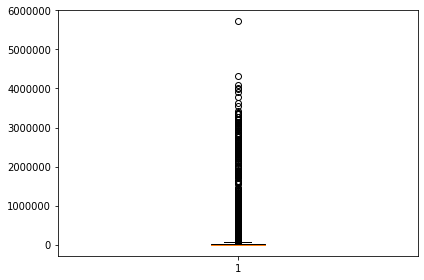

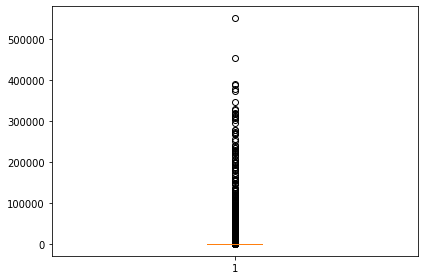

In [38]:
for i in ['Total Volume','AveragePrice','Total Bags','Small Bags','Large Bags','XLarge Bags']:
    plt.boxplot(i,data=df_av)
    plt.tight_layout()
    plt.show()
#Some outliers are present in AveragePrice

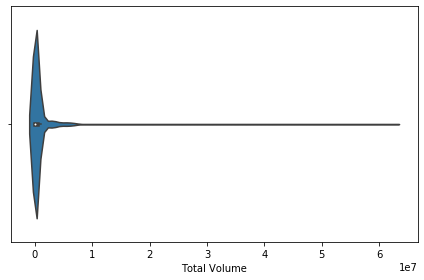

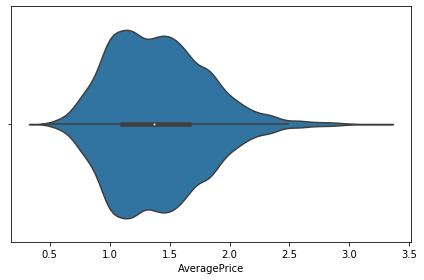

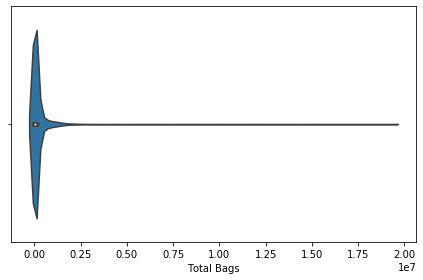

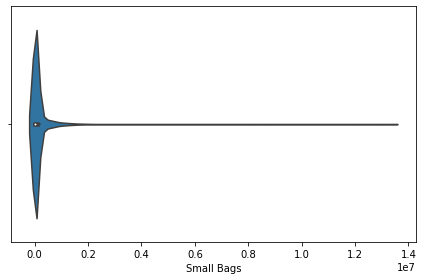

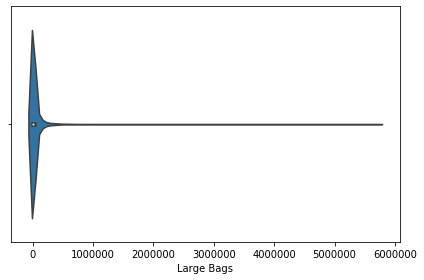

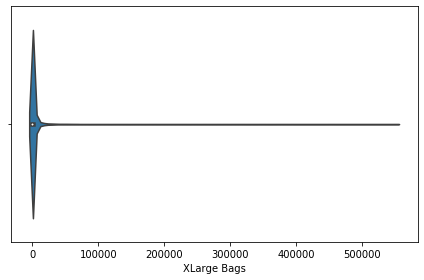

In [40]:
for i in ['Total Volume','AveragePrice','Total Bags','Small Bags','Large Bags','XLarge Bags']:
    sns.violinplot(x=i,data=df_av)
    plt.tight_layout()
    plt.show()

# Correlation

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['type','region']:
    df_av[i]=le.fit_transform(df_av[i])
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [40]:
#Checking the correlation between the attributes
df_av.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.075134,0.061157
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.015344,-0.013212
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014522,-0.014375
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.015892,-0.014567
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.024220,-0.012446
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.013061,-0.008687
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.012432,-0.007999
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.014330,-0.010477
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.006182,-0.002364
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000017,-0.000052


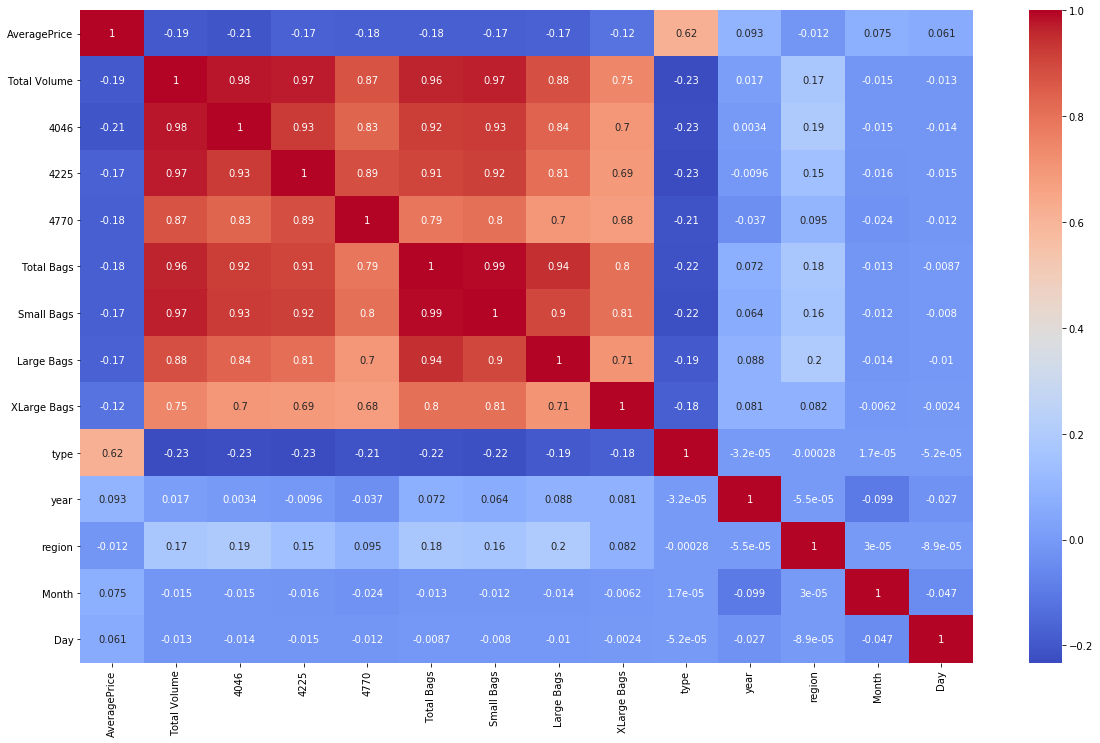

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(df_av.corr(),cmap='coolwarm',annot=True)
plt.show()

In [42]:
#Most of the attributes are not year related to AveragePrice except 'type'
#Attributes Total Volume, PLU 4046,4225,4770,Total Bags,Small Bags, Large Bags,XLarge Bags 
#have high correlations among themselves

# Multivariate Analysis

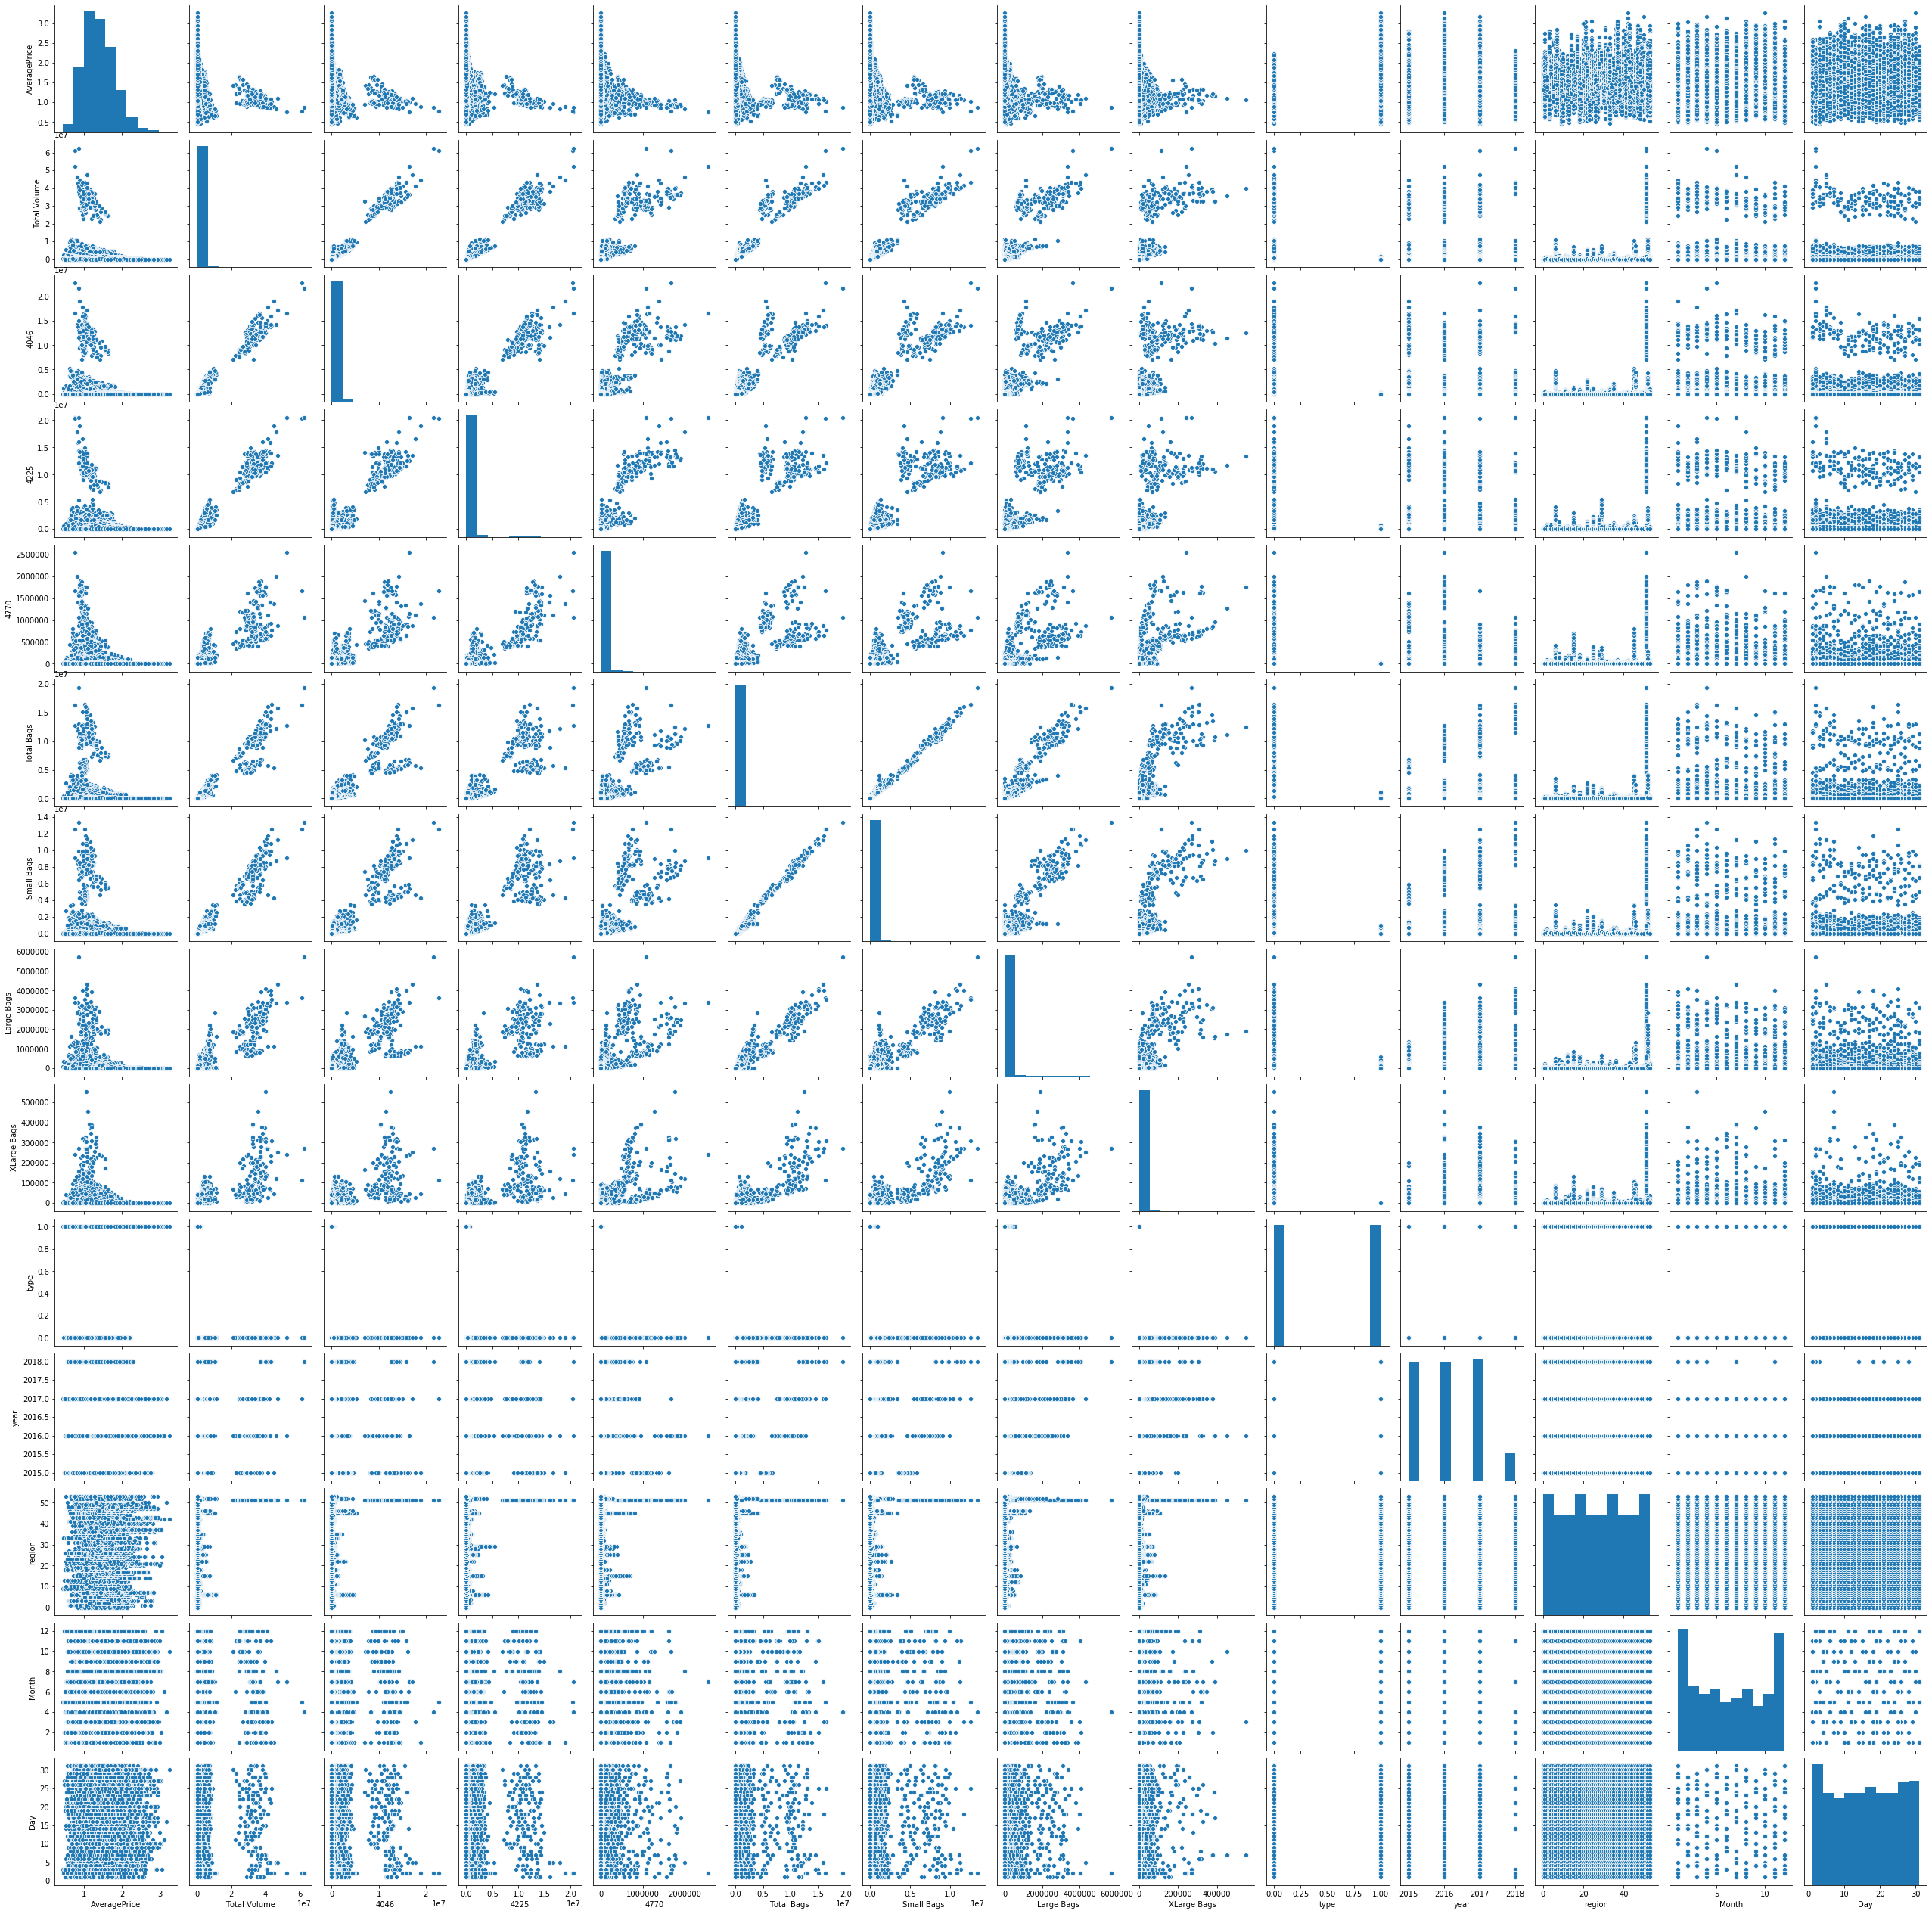

In [45]:
sns.pairplot(df_av)

# Regression with AveragePrice as Target Variable

In [47]:
df_av_reg=pd.get_dummies(df_av.drop(['region','Date'],axis=1),drop_first=True)

In [48]:
df_av_reg.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


In [49]:
df_av_reg.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,7,1


In [50]:
#Cheking the skewness of data
df_av_reg.skew()
# From below ouput, we can say Runs,Hits,CG,Saves,Errors have high skewness

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.047551
Day             -0.001609
dtype: float64

In [51]:
#removing skewness using log transform
for col in df_av_reg.columns:
    if df_av_reg.skew().loc[col]>0.55:
        df_av_reg[col]=np.log1p(df_av_reg[col])

In [53]:
df_av_reg.skew()
#skewness reduced

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
Month           0.047551
Day            -0.001609
dtype: float64

In [54]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_av_reg))
print(zscore)
print(np.where(zscore>3))
df_av_new=df_av_reg[(zscore<3).all(axis=1)]

[[0.11191784 0.10728205 0.60975177 ... 1.22128204 1.59638512 1.2836846 ]
 [0.06002047 0.1759487  0.73770703 ... 1.22128204 1.59638512 0.5045482 ]
 [1.25556016 0.15869039 0.68884013 ... 1.22128204 1.59638512 0.2745882 ]
 ...
 [1.15374345 0.77890112 0.56825116 ... 1.97050371 1.52423765 0.6158534 ]
 [1.2793746  0.70779758 0.49440715 ... 1.97050371 1.52423765 0.163283  ]
 [0.6003593  0.67454176 0.30415101 ... 1.97050371 0.17792022 1.61025061]]
(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11

In [55]:
print('Before removing outliers:',df_av_reg.shape)
print('After removing outliers:',df_av_new.shape)

Before removing outliers: (18249, 13)
After removing outliers: (17928, 13)


In [56]:
#separating into input and output variables
df_x=df_av_new.drop(columns=['AveragePrice'])
y=pd.DataFrame(df_av_new['AveragePrice'])

In [57]:
df_x.shape

(17928, 12)

In [58]:
y.shape

(17928, 1)

In [59]:
df_x.skew()

Total Volume    0.069796
4046           -0.348357
4225           -0.405482
4770            0.071455
Total Bags     -0.111419
Small Bags     -0.259482
Large Bags     -0.563610
XLarge Bags     1.148988
type            0.034814
year            0.201664
Month           0.048919
Day            -0.001855
dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
    final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [64]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.558661189181563
r2 score corresponding to 43 is 0.5576338888901615
r2 score corresponding to 44 is 0.5520059721879857
r2 score corresponding to 45 is 0.5457663572033451
r2 score corresponding to 46 is 0.553213313950526
r2 score corresponding to 47 is 0.5432857296072544
r2 score corresponding to 48 is 0.5430127958790809
r2 score corresponding to 49 is 0.5506454080187579
r2 score corresponding to 50 is 0.5412900025420869
r2 score corresponding to 51 is 0.5410178295686189
r2 score corresponding to 52 is 0.5464169462524042
r2 score corresponding to 53 is 0.5542566197163552
r2 score corresponding to 54 is 0.5532445662219214
r2 score corresponding to 55 is 0.5392862199418602
r2 score corresponding to 56 is 0.548028602153575
r2 score corresponding to 57 is 0.5471416619774656
r2 score corresponding to 58 is 0.5542041584015196
r2 score corresponding to 59 is 0.5302942976190425
r2 score corresponding to 60 is 0.5618661947288344
r2 score corresponding to 61 is 0.

In [65]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,df_x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,df_x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression: 0.25471296148457523
Standard Deviation in r2 score for Linear Regression: 0.1281552945401693


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 18}

In [67]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=18)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7252143749926028
r2 score corresponding to 43 is 0.7313034103444426
r2 score corresponding to 44 is 0.7258016899497306
r2 score corresponding to 45 is 0.7184795441018625
r2 score corresponding to 46 is 0.7161367350941017
r2 score corresponding to 47 is 0.7305952436416479
r2 score corresponding to 48 is 0.7206326362463124
r2 score corresponding to 49 is 0.7293749097110966
r2 score corresponding to 50 is 0.7263455044829434
r2 score corresponding to 51 is 0.7265459338861229
r2 score corresponding to 52 is 0.7108165881979885
r2 score corresponding to 53 is 0.7242445748957627
r2 score corresponding to 54 is 0.7231241475228569
r2 score corresponding to 55 is 0.7196261967946087
r2 score corresponding to 56 is 0.7189421895679398
r2 score corresponding to 57 is 0.725995387049642
r2 score corresponding to 58 is 0.7270426198035299
r2 score corresponding to 59 is 0.7242718826378567
r2 score corresponding to 60 is 0.73307376504067
r2 score corresponding to 61 is 0.

In [68]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression: 0.25471296148459033
Standard Deviation in r2 score for Linear Regression: 0.12815529454016086

Mean r2 score for KNN Regression: 0.23888044281898607
Standard Deviation in r2 score for KNN Regression: 0.22405019034247473


In [69]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [70]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.0001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.5587018942943093
r2 score corresponding to 43 is 0.5575117051381858
r2 score corresponding to 44 is 0.551929121374743
r2 score corresponding to 45 is 0.545502836276979
r2 score corresponding to 46 is 0.5531226895024048
r2 score corresponding to 47 is 0.5433568529827251
r2 score corresponding to 48 is 0.5428143973590225
r2 score corresponding to 49 is 0.5506581031663758
r2 score corresponding to 50 is 0.5414069591142114
r2 score corresponding to 51 is 0.5410729533692205
r2 score corresponding to 52 is 0.5461732284663688
r2 score corresponding to 53 is 0.5541240169371643
r2 score corresponding to 54 is 0.553153986526228
r2 score corresponding to 55 is 0.5391823529731484
r2 score corresponding to 56 is 0.5482888316866639
r2 score corresponding to 57 is 0.5470722500745911
r2 score corresponding to 58 is 0.5542404633740282
r2 score corresponding to 59 is 0.5304734557834504
r2 score corresponding to 60 is 0.5619644925229956
r2 score corresponding to 61 is 0.

In [71]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.25444151795745257
Standard Deviation in r2 score for Lasso Regression: 0.12915070222172587


In [72]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [73]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.5586715039846871
r2 score corresponding to 43 is 0.5576357575910117
r2 score corresponding to 44 is 0.5520031977654958
r2 score corresponding to 45 is 0.5457511907976023
r2 score corresponding to 46 is 0.5532080320029076
r2 score corresponding to 47 is 0.5432934949631498
r2 score corresponding to 48 is 0.5429941939136493
r2 score corresponding to 49 is 0.5506553283096082
r2 score corresponding to 50 is 0.5412981060512257
r2 score corresponding to 51 is 0.5410264588079134
r2 score corresponding to 52 is 0.5464029232859366
r2 score corresponding to 53 is 0.5542519734635387
r2 score corresponding to 54 is 0.5532450171615537
r2 score corresponding to 55 is 0.5392807226955001
r2 score corresponding to 56 is 0.548054121267197
r2 score corresponding to 57 is 0.5471424573715445
r2 score corresponding to 58 is 0.5542120033767985
r2 score corresponding to 59 is 0.5303043586043485
r2 score corresponding to 60 is 0.5618705332801872
r2 score corresponding to 61 is 

In [74]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.25468653932752233
Standard Deviation in r2 score for Ridge Regression: 0.12824855801052473


In [78]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [80]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.4677113456295315
Standard Deviation in r2 score for Gradient Boosting Regression: 0.17941766139955478


In [85]:
#checking maximum r2 score corresponding to Gradient Boost
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.8277959299526287
r2 score corresponding to 43 is 0.8344616693389589
r2 score corresponding to 44 is 0.8271114312636423
r2 score corresponding to 45 is 0.823644542795751
r2 score corresponding to 46 is 0.8239430374149216
r2 score corresponding to 47 is 0.831890266869901
r2 score corresponding to 48 is 0.8212289882838072
r2 score corresponding to 49 is 0.8269094155760532
r2 score corresponding to 50 is 0.8215313387981081
r2 score corresponding to 51 is 0.8297353098432864
r2 score corresponding to 52 is 0.8218081865129157
r2 score corresponding to 53 is 0.8271658936915076
r2 score corresponding to 54 is 0.824680119624102
r2 score corresponding to 55 is 0.818265828175839
r2 score corresponding to 56 is 0.8241561025810794
r2 score corresponding to 57 is 0.8316952128958985
r2 score corresponding to 58 is 0.8270706573065318
r2 score corresponding to 59 is 0.8263120492324574
r2 score corresponding to 60 is 0.8374635966011015
r2 score corresponding to 61 is 0.8

In [79]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [81]:
dtr=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=dtr,learning_rate=1,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.2853299715796457
Standard Deviation in r2 score for Ada Boost Regression: 0.24982383078888526


In [82]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.8886968023340575
r2 score corresponding to 43 is 0.8807933991578255
r2 score corresponding to 44 is 0.8840935429380515
r2 score corresponding to 45 is 0.8808770162820463
r2 score corresponding to 46 is 0.8746627597850322
r2 score corresponding to 47 is 0.8872777080422845
r2 score corresponding to 48 is 0.8838833333758644
r2 score corresponding to 49 is 0.8777481674506031
r2 score corresponding to 50 is 0.8785736634503862
r2 score corresponding to 51 is 0.879986531203877
r2 score corresponding to 52 is 0.8790679097240424
r2 score corresponding to 53 is 0.8783203196714157
r2 score corresponding to 54 is 0.8781010288551354
r2 score corresponding to 55 is 0.8773175897498128
r2 score corresponding to 56 is 0.8820727303193027
r2 score corresponding to 57 is 0.8782990384530894
r2 score corresponding to 58 is 0.8774920676961703
r2 score corresponding to 59 is 0.8821686200234633
r2 score corresponding to 60 is 0.8857122790794819
r2 score corresponding to 61 is 

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
print("Mean r2 score for RandomForestRegressor:",cross_val_score(rfr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for RandomForestRegressor:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for RandomForestRegressor: 0.24438982808392926
Standard Deviation in r2 score for RandomForestRegressor: 0.2505931638492243


In [86]:
#checking maximum r2 score corresponding to RandomForestRegressor
r_state=maxr2_score(rfr,x,y)

r2 score corresponding to 42 is 0.8564957384043508
r2 score corresponding to 43 is 0.8521532275290085
r2 score corresponding to 44 is 0.8552596057908102
r2 score corresponding to 45 is 0.8560728427334608
r2 score corresponding to 46 is 0.8468722119015424
r2 score corresponding to 47 is 0.8592205712320479
r2 score corresponding to 48 is 0.8527844824461318
r2 score corresponding to 49 is 0.8466632248191412
r2 score corresponding to 50 is 0.8453218870437672
r2 score corresponding to 51 is 0.8511921937937292
r2 score corresponding to 52 is 0.8514565779844697
r2 score corresponding to 53 is 0.8519826028385689
r2 score corresponding to 54 is 0.8460063691108521
r2 score corresponding to 55 is 0.8461064952967927
r2 score corresponding to 56 is 0.851816798977126
r2 score corresponding to 57 is 0.850604859811829
r2 score corresponding to 58 is 0.85159551523125
r2 score corresponding to 59 is 0.8530342150275274
r2 score corresponding to 60 is 0.8580683094503718
r2 score corresponding to 61 is 0.8

In [89]:
#We tried all methods and till now AdaBoostRegressor is the best option 
#Random state corresponding to highest r2 score is 69
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=0.20)
ada_reg=AdaBoostRegressor(base_estimator=dtr,learning_rate=1,n_estimators=500)
ada_reg.fit(x_train,y_train)
y_pred=ada_reg.predict(x_test)

In [90]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.054565375465866935
r2 score is: 0.8902381346888351


In [91]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(ada_reg,"Project3_avocado.pkl")

['Project3_avocado.pkl']

# Classification with Region as the Target Variable

In [132]:
df_av=pd.read_csv('E:/project3_avocado.csv',parse_dates=['Date'])
df_av=pd.DataFrame(df_av)
df_av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [133]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_av['region']=le.fit_transform(df_av['region'])
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_av['type']=le.fit_transform(df_av['type'])
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [136]:
df_av.drop(['Date'],axis=1,inplace=True)

In [137]:
#checking for skewness
df_av.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [142]:
#removing skewness using log transform
for col in df_av.columns:
    if df_av.skew().loc[col]>0.55:
        df_av[col]=np.log1p(df_av[col])

In [143]:
df_av.skew()
#skewness reduced

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [144]:
df_av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [145]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_av))
print(zscore)
print(np.where(zscore>3))
df_av_class=df_av[(zscore<3).all(axis=1)]

[[0.11191784 0.10728205 0.60975177 ... 0.99983562 1.22128204 1.7002522 ]
 [0.06002047 0.1759487  0.73770703 ... 0.99983562 1.22128204 1.7002522 ]
 [1.25556016 0.15869039 0.68884013 ... 0.99983562 1.22128204 1.7002522 ]
 ...
 [1.15374345 0.77890112 0.56825116 ... 1.00016441 1.97050371 1.70081131]
 [1.2793746  0.70779758 0.49440715 ... 1.00016441 1.97050371 1.70081131]
 [0.6003593  0.67454176 0.30415101 ... 1.00016441 1.97050371 1.70081131]]
(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11

In [146]:
print('Before removing outliers:',df_av.shape)
print('After removing outliers:',df_av_class.shape)

Before removing outliers: (18249, 12)
After removing outliers: (17928, 12)


In [147]:
#separating into input and output variables
df_x=df_av_class.drop(columns=['region'])
y=pd.DataFrame(df_av_class['region'])

In [148]:
df_x.shape

(17928, 11)

In [149]:
y.shape

(17928, 1)

In [150]:
df_x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018


In [151]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [156]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
print()
print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.5418293363078639
confusion matrix corresponding to random state: 42 is: [[45  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  4]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  2  1 ...  0  0 15]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.82      0.61      0.70        74
           1       0.17      0.32      0.22        56
           2       0.70      0.58      0.64        72
           3       0.64      0.39      0.49        64
           4       0.47      0.44     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 42 is: 0.8073061907417736
confusion matrix corresponding to random state: 42 is: [[54  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  1]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  1  2 ...  0  0 46]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.87      0.73      0.79        74
           1       0.61      0.71      0.66        56
           2       0.93      0.92      0.92  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 43 is: 0.8326826547685443
confusion matrix corresponding to random state: 43 is: [[65  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  1  0 ...  0  0 39]]
classification report corresponding to random state: 43 is:               precision    recall  f1-score   support

           0       0.83      0.90      0.87        72
           1       0.69      0.72      0.71        65
           2       0.89      0.94      0.91        68
           3       0.76      0.86      0.81        59
           4       0.86      0.87      0.87        70
           5       0.78      0.72      0.75        65
           6       0.94      1.00      0.97        68
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 43 is: 0.053541550474065815
confusion matrix corresponding to random state: 43 is: [[10  0  0 ...  0  0  0]
 [ 3  0  0 ...  0 10  0]
 [ 4  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 40 16  0]
 [ 0  0  0 ... 32  0  0]
 [11  0  0 ...  0 21  0]]
classification report corresponding to random state: 43 is:               precision    recall  f1-score   support

           0       0.03      0.14      0.05        72
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        68
           3       0.08      0.36      0.12        59
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00        65
           6       0.07      0.03      0.04        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        66
           9       0.04      0.06      0.05    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 44 is: 0.8181818181818182
confusion matrix corresponding to random state: 44 is: [[59  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 65  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  2  1 ...  0  0 51]]
classification report corresponding to random state: 44 is:               precision    recall  f1-score   support

           0       0.75      0.89      0.81        66
           1       0.51      0.61      0.56        59
           2       0.96      1.00      0.98        70
           3       0.71      0.88      0.79        52
           4       0.88      0.90      0.89        58
           5       0.79      0.69      0.74        65
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 45 is: 0.5476854433909648
confusion matrix corresponding to random state: 45 is: [[55  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  1]
 ...
 [ 0  0  0 ... 64  1  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  3  0 ...  0  0 15]]
classification report corresponding to random state: 45 is:               precision    recall  f1-score   support

           0       0.72      0.71      0.72        77
           1       0.22      0.30      0.26        67
           2       0.68      0.63      0.65        54
           3       0.69      0.49      0.57        68
           4       0.51      0.53     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 45 is: 0.8050752928053542
confusion matrix corresponding to random state: 45 is: [[62  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  2  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  0  2 ...  0  0 49]]
classification report corresponding to random state: 45 is:               precision    recall  f1-score   support

           0       0.85      0.81      0.83        77
           1       0.66      0.61      0.64        67
           2       0.89      0.93      0.91  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 46 is: 0.8555493586168432
confusion matrix corresponding to random state: 46 is: [[74  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  1]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  0  0 ...  0  0 48]]
classification report corresponding to random state: 46 is:               precision    recall  f1-score   support

           0       0.88      0.94      0.91        79
           1       0.74      0.81      0.77        62
           2       0.93      0.95      0.94        79
           3       0.87      0.74      0.80        61
           4       0.89      0.85      0.87        66
           5       0.86      0.87      0.86        69
           6       0.94      0.98      0.96        65
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 46 is: 0.06079196876742889
confusion matrix corresponding to random state: 46 is: [[32  0  0 ...  0  0  0]
 [ 9  0  0 ...  0  8  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  8  0]
 [ 0  0  0 ... 41  0  0]
 [16  0  0 ...  0 25  0]]
classification report corresponding to random state: 46 is:               precision    recall  f1-score   support

           0       0.07      0.41      0.12        79
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        79
           3       0.15      0.39      0.21        61
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        69
           6       0.08      0.05      0.06        65
           7       0.10      0.04      0.06        73
           8       0.00      0.00      0.00        70
           9       0.04      0.05      0.05     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 47 is: 0.8176240936977134
confusion matrix corresponding to random state: 47 is: [[63  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  2 ...  0  0 42]]
classification report corresponding to random state: 47 is:               precision    recall  f1-score   support

           0       0.73      0.98      0.84        64
           1       0.47      0.70      0.57        54
           2       0.94      0.99      0.96        69
           3       0.90      0.81      0.86        80
           4       0.93      0.93      0.93        67
           5       0.88      0.73      0.80        62
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 48 is: 0.5345789180145009
confusion matrix corresponding to random state: 48 is: [[48  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  4]
 ...
 [ 0  0  0 ... 64  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  6  0 ...  0  0 16]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.73      0.80      0.76        60
           1       0.20      0.34      0.25        58
           2       0.53      0.60      0.56        42
           3       0.55      0.45      0.49        53
           4       0.50      0.42     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 48 is: 0.7928053541550474
confusion matrix corresponding to random state: 48 is: [[51  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 64  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  1  1 ...  0  0 51]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.77      0.85      0.81        60
           1       0.65      0.69      0.67        58
           2       0.86      0.88      0.87  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 49 is: 0.8519241494701617
confusion matrix corresponding to random state: 49 is: [[73  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  0 ...  0  0 53]]
classification report corresponding to random state: 49 is:               precision    recall  f1-score   support

           0       0.85      0.94      0.89        78
           1       0.65      0.83      0.73        66
           2       0.90      1.00      0.94        60
           3       0.81      0.92      0.86        62
           4       0.87      0.93      0.90        71
           5       0.77      0.82      0.79        65
           6       0.97      0.99      0.98        69
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 49 is: 0.04517568321249303
confusion matrix corresponding to random state: 49 is: [[27  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  7  0]
 [ 5  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  6  0]
 [ 0  0  0 ... 33  1  0]
 [13  0  0 ...  0 21  0]]
classification report corresponding to random state: 49 is:               precision    recall  f1-score   support

           0       0.06      0.35      0.10        78
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        60
           3       0.08      0.32      0.13        62
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00        65
           6       0.03      0.01      0.02        69
           7       0.03      0.02      0.02        55
           8       0.00      0.00      0.00        60
           9       0.01      0.02      0.01     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 50 is: 0.8131622978248745
confusion matrix corresponding to random state: 50 is: [[59  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  1]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  2 ...  0  0 41]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0       0.72      0.87      0.79        68
           1       0.64      0.67      0.65        55
           2       0.94      1.00      0.97        60
           3       0.82      0.72      0.77        69
           4       0.82      0.87      0.85        54
           5       0.78      0.70      0.74        50
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 51 is: 0.560234244283324
confusion matrix corresponding to random state: 51 is: [[42  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  4]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  1  0 ...  0  0 18]]
classification report corresponding to random state: 51 is:               precision    recall  f1-score   support

           0       0.63      0.68      0.65        62
           1       0.31      0.45      0.37        66
           2       0.72      0.57      0.64        74
           3       0.67      0.45      0.54        64
           4       0.47      0.52      

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 51 is: 0.8045175683212493
confusion matrix corresponding to random state: 51 is: [[48  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  2]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  2  1 ...  0  0 48]]
classification report corresponding to random state: 51 is:               precision    recall  f1-score   support

           0       0.83      0.77      0.80        62
           1       0.63      0.83      0.72        66
           2       0.90      0.86      0.88  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 52 is: 0.8374233128834356
confusion matrix corresponding to random state: 52 is: [[53  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 63  0]
 [ 0  1  0 ...  0  0 44]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.65      0.93      0.76        57
           1       0.70      0.76      0.73        59
           2       0.89      0.99      0.94        69
           3       0.82      0.87      0.84        68
           4       0.88      0.85      0.86        82
           5       0.80      0.72      0.76        65
           6       0.99      0.96      0.97        70
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 52 is: 0.047406581148912434
confusion matrix corresponding to random state: 52 is: [[14  0  0 ...  0  0  0]
 [ 5  0  0 ...  0  8  0]
 [ 9  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 27 10  0]
 [ 0  0  0 ... 30  2  0]
 [17  0  0 ...  0 16  0]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.03      0.25      0.05        57
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        69
           3       0.10      0.28      0.15        68
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        65
           6       0.14      0.04      0.07        70
           7       0.03      0.01      0.02        80
           8       0.00      0.00      0.00        73
           9       0.05      0.08      0.06    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 53 is: 0.8156720580033463
confusion matrix corresponding to random state: 53 is: [[64  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  1]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  0  1 ...  0  0 43]]
classification report corresponding to random state: 53 is:               precision    recall  f1-score   support

           0       0.75      0.94      0.84        68
           1       0.51      0.55      0.53        64
           2       0.95      1.00      0.97        55
           3       0.91      0.80      0.85        61
           4       0.86      0.89      0.87        62
           5       0.80      0.75      0.77        64
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 54 is: 0.5499163413273843
confusion matrix corresponding to random state: 54 is: [[41  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  1]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  2  0 ...  0  0 15]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.61      0.69      0.65        59
           1       0.33      0.34      0.34        76
           2       0.70      0.69      0.70        55
           3       0.71      0.38      0.50        71
           4       0.49      0.51     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 54 is: 0.8031232571109872
confusion matrix corresponding to random state: 54 is: [[43  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  0  0 ...  0  0 46]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.83      0.73      0.77        59
           1       0.83      0.63      0.72        76
           2       0.89      0.91      0.90  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 55 is: 0.8446737311767987
confusion matrix corresponding to random state: 55 is: [[64  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 64  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  0  0 ...  0  0 48]]
classification report corresponding to random state: 55 is:               precision    recall  f1-score   support

           0       0.88      0.98      0.93        65
           1       0.55      0.71      0.62        49
           2       0.90      0.97      0.93        63
           3       0.85      0.80      0.82        64
           4       0.89      0.89      0.89        61
           5       0.76      0.82      0.79        66
           6       0.92      1.00      0.96        61
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 55 is: 0.0501952035694367
confusion matrix corresponding to random state: 55 is: [[20  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  6  0]
 [ 2  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  8  0]
 [ 0  1  0 ... 35  0  0]
 [15  0  0 ...  0 23  0]]
classification report corresponding to random state: 55 is:               precision    recall  f1-score   support

           0       0.05      0.31      0.08        65
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        63
           3       0.11      0.31      0.16        64
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        66
           6       0.04      0.02      0.02        61
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00        75
           9       0.09      0.11      0.10      

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 56 is: 0.8201338538761852
confusion matrix corresponding to random state: 56 is: [[57  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  1 ...  0  0 50]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0       0.73      0.93      0.82        61
           1       0.57      0.57      0.57        69
           2       0.94      1.00      0.97        63
           3       0.86      0.84      0.85        68
           4       0.92      0.86      0.89        77
           5       0.90      0.79      0.84        67
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 57 is: 0.552983825989961
confusion matrix corresponding to random state: 57 is: [[55  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  9]
 ...
 [ 0  0  0 ... 63  3  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  2  0 ...  0  0 16]]
classification report corresponding to random state: 57 is:               precision    recall  f1-score   support

           0       0.75      0.68      0.71        81
           1       0.22      0.37      0.28        65
           2       0.69      0.55      0.61        64
           3       0.58      0.41      0.48        64
           4       0.42      0.43      

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 57 is: 0.8053541550474066
confusion matrix corresponding to random state: 57 is: [[65  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  1]
 [ 0  0 56 ...  0  0  1]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 43]]
classification report corresponding to random state: 57 is:               precision    recall  f1-score   support

           0       0.77      0.80      0.79        81
           1       0.66      0.63      0.65        65
           2       0.90      0.88      0.89  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 58 is: 0.8469046291132181
confusion matrix corresponding to random state: 58 is: [[60  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  1]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  0  1 ...  0  0 48]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.82      0.92      0.87        65
           1       0.68      0.78      0.73        60
           2       0.88      0.95      0.91        79
           3       0.85      0.83      0.84        69
           4       0.89      0.93      0.91        72
           5       0.82      0.80      0.81        69
           6       1.00      0.97      0.98        67
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 58 is: 0.050474065811489124
confusion matrix corresponding to random state: 58 is: [[23  0  0 ...  0  0  0]
 [ 8  0  0 ...  0 13  0]
 [ 7  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 34 10  0]
 [ 0  0  0 ... 41  0  0]
 [13  0  0 ...  0 25  0]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.05      0.35      0.08        65
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        79
           3       0.11      0.30      0.16        69
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        69
           6       0.05      0.01      0.02        67
           7       0.06      0.03      0.04        75
           8       0.00      0.00      0.00        56
           9       0.03      0.03      0.03    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 59 is: 0.8243167875069716
confusion matrix corresponding to random state: 59 is: [[69  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  1  1 ...  0  0 52]]
classification report corresponding to random state: 59 is:               precision    recall  f1-score   support

           0       0.73      0.92      0.81        75
           1       0.60      0.61      0.60        56
           2       0.97      0.99      0.98        73
           3       0.90      0.87      0.88        69
           4       0.85      0.95      0.90        63
           5       0.87      0.70      0.78        74
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 60 is: 0.5390407138873397
confusion matrix corresponding to random state: 60 is: [[42  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  2]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  3  0 ...  0  0 15]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.67      0.69      0.68        61
           1       0.23      0.24      0.24        82
           2       0.68      0.55      0.61        73
           3       0.54      0.48      0.51        60
           4       0.34      0.41     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 60 is: 0.7986614612381484
confusion matrix corresponding to random state: 60 is: [[50  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  2]
 [ 0  0 62 ...  0  0  1]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  0 ...  0  0 48]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.79      0.82      0.81        61
           1       0.79      0.63      0.70        82
           2       0.93      0.85      0.89  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 61 is: 0.8449525934188511
confusion matrix corresponding to random state: 61 is: [[63  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  1 ...  0  0 61]]
classification report corresponding to random state: 61 is:               precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.83      0.74      0.78        72
           2       0.88      0.98      0.93        65
           3       0.93      0.80      0.86        70
           4       0.88      0.91      0.90        82
           5       0.86      0.81      0.83        73
           6       0.95      0.97      0.96        71
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 61 is: 0.04880089235917457
confusion matrix corresponding to random state: 61 is: [[11  0  1 ...  0  0  0]
 [ 3  0  0 ...  0 13  0]
 [ 4  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  7  0]
 [ 0  0  0 ... 26  1  0]
 [16  0  0 ...  0 28  0]]
classification report corresponding to random state: 61 is:               precision    recall  f1-score   support

           0       0.03      0.16      0.05        69
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        65
           3       0.12      0.40      0.18        70
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        73
           6       0.08      0.03      0.04        71
           7       0.03      0.01      0.02        69
           8       0.00      0.00      0.00        69
           9       0.03      0.03      0.03     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 62 is: 0.8259899609592861
confusion matrix corresponding to random state: 62 is: [[63  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  1]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  2 ...  0  0 51]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.74      0.97      0.84        65
           1       0.58      0.62      0.60        61
           2       0.94      0.99      0.96        68
           3       0.88      0.79      0.83        72
           4       0.91      0.93      0.92        76
           5       0.86      0.75      0.80        65
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.5518683770217513
confusion matrix corresponding to random state: 63 is: [[54  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 47 ...  0  0  4]
 ...
 [ 0  0  0 ... 71  1  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  2  0 ...  0  0 13]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0       0.71      0.68      0.70        79
           1       0.19      0.42      0.26        53
           2       0.78      0.66      0.72        71
           3       0.69      0.51      0.59        85
           4       0.43      0.48     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 63 is: 0.8109313998884551
confusion matrix corresponding to random state: 63 is: [[64  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  1]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  1  0 ...  0 65  0]
 [ 0  1  1 ...  0  0 38]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0       0.90      0.81      0.85        79
           1       0.65      0.79      0.71        53
           2       0.94      0.85      0.89  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 64 is: 0.8491355270496375
confusion matrix corresponding to random state: 64 is: [[70  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  1]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  0 ...  0  0 43]]
classification report corresponding to random state: 64 is:               precision    recall  f1-score   support

           0       0.82      0.96      0.89        73
           1       0.65      0.68      0.67        66
           2       0.91      0.97      0.94        70
           3       0.79      0.80      0.79        60
           4       0.90      0.88      0.89        81
           5       0.80      0.77      0.79        71
           6       0.96      1.00      0.98        68
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 64 is: 0.04852203011712214
confusion matrix corresponding to random state: 64 is: [[20  0  1 ...  0  0  0]
 [ 3  0  0 ...  0  6  0]
 [ 6  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  8  0]
 [ 0  0  0 ... 27  0  0]
 [10  0  0 ...  0 19  0]]
classification report corresponding to random state: 64 is:               precision    recall  f1-score   support

           0       0.05      0.27      0.08        73
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        70
           3       0.10      0.37      0.16        60
           4       0.00      0.00      0.00        81
           5       0.00      0.00      0.00        71
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        67
           8       0.00      0.00      0.00        72
           9       0.03      0.03      0.03     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 65 is: 0.8237590630228667
confusion matrix corresponding to random state: 65 is: [[72  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  1  0 ...  0  0 54]]
classification report corresponding to random state: 65 is:               precision    recall  f1-score   support

           0       0.76      0.95      0.84        76
           1       0.56      0.55      0.56        49
           2       0.98      0.95      0.97        66
           3       0.85      0.81      0.83        75
           4       0.92      0.91      0.92        66
           5       0.95      0.75      0.84        75
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 66 is: 0.5580033463469046
confusion matrix corresponding to random state: 66 is: [[45  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 45 ...  0  0  1]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  2  0 ...  0  0 22]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0       0.78      0.64      0.70        70
           1       0.20      0.29      0.24        59
           2       0.70      0.67      0.69        67
           3       0.60      0.52      0.56        65
           4       0.55      0.43     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 66 is: 0.7961517010596765
confusion matrix corresponding to random state: 66 is: [[49  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  1]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  1 ...  0  0 45]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0       0.78      0.70      0.74        70
           1       0.72      0.71      0.72        59
           2       0.94      0.87      0.90  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 67 is: 0.8466257668711656
confusion matrix corresponding to random state: 67 is: [[71  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  0 ...  0  0 65]]
classification report corresponding to random state: 67 is:               precision    recall  f1-score   support

           0       0.85      0.95      0.89        75
           1       0.69      0.76      0.72        62
           2       0.90      0.97      0.93        62
           3       0.79      0.77      0.78        65
           4       0.88      0.94      0.91        53
           5       0.79      0.79      0.79        70
           6       0.96      0.99      0.97        72
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 67 is: 0.04852203011712214
confusion matrix corresponding to random state: 67 is: [[ 9  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  8  0]
 [ 7  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 38 11  0]
 [ 0  0  0 ... 37  0  0]
 [18  0  0 ...  0 23  0]]
classification report corresponding to random state: 67 is:               precision    recall  f1-score   support

           0       0.02      0.12      0.04        75
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        62
           3       0.12      0.38      0.18        65
           4       0.00      0.00      0.00        53
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        72
           7       0.07      0.03      0.04        74
           8       0.00      0.00      0.00        74
           9       0.03      0.03      0.03     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 68 is: 0.8279419966536531
confusion matrix corresponding to random state: 68 is: [[56  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  1  1 ...  0  0 49]]
classification report corresponding to random state: 68 is:               precision    recall  f1-score   support

           0       0.80      0.93      0.86        60
           1       0.70      0.71      0.71        73
           2       0.92      0.97      0.95        63
           3       0.81      0.83      0.82        63
           4       0.94      0.86      0.90        76
           5       0.89      0.74      0.81        68
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 69 is: 0.5351366424986057
confusion matrix corresponding to random state: 69 is: [[45  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  1]
 ...
 [ 0  0  0 ... 78  2  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  1  0 ...  0  0 13]]
classification report corresponding to random state: 69 is:               precision    recall  f1-score   support

           0       0.76      0.62      0.68        73
           1       0.30      0.45      0.36        60
           2       0.64      0.59      0.61        63
           3       0.51      0.51      0.51        53
           4       0.38      0.35     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 69 is: 0.8022866703848299
confusion matrix corresponding to random state: 69 is: [[56  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 48 ...  0  0  1]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  1 56  0]
 [ 0  0  2 ...  0  0 54]]
classification report corresponding to random state: 69 is:               precision    recall  f1-score   support

           0       0.81      0.77      0.79        73
           1       0.74      0.62      0.67        60
           2       0.91      0.76      0.83  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 70 is: 0.8449525934188511
confusion matrix corresponding to random state: 70 is: [[70  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 54]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.85      0.92      0.89        76
           1       0.74      0.76      0.75        63
           2       0.87      0.93      0.90        59
           3       0.89      0.87      0.88        77
           4       0.87      0.94      0.91        71
           5       0.83      0.74      0.78        78
           6       0.94      0.94      0.94        69
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 70 is: 0.048243167875069715
confusion matrix corresponding to random state: 70 is: [[28  0  0 ...  0  0  0]
 [ 3  0  0 ...  0 16  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  7  0]
 [ 0  0  0 ... 31  0  0]
 [12  0  0 ...  0 21  0]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.06      0.37      0.11        76
           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        59
           3       0.10      0.26      0.14        77
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00        78
           6       0.02      0.01      0.02        69
           7       0.05      0.03      0.04        70
           8       0.00      0.00      0.00        78
           9       0.05      0.06      0.05    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 71 is: 0.8232013385387619
confusion matrix corresponding to random state: 71 is: [[63  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 42]]
classification report corresponding to random state: 71 is:               precision    recall  f1-score   support

           0       0.71      0.89      0.79        71
           1       0.63      0.57      0.60        60
           2       0.93      0.99      0.96        70
           3       0.79      0.79      0.79        63
           4       0.96      0.93      0.94        73
           5       0.88      0.75      0.81        81
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 72 is: 0.5538204127161183
confusion matrix corresponding to random state: 72 is: [[42  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  3]
 ...
 [ 0  0  0 ... 66  1  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  1  1 ...  0  0 13]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.70      0.67      0.68        63
           1       0.30      0.41      0.35        64
           2       0.74      0.50      0.60        74
           3       0.62      0.40      0.49        77
           4       0.55      0.51     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 72 is: 0.8092582264361405
confusion matrix corresponding to random state: 72 is: [[48  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  1]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  2  1 ...  0  0 42]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.77      0.76      0.77        63
           1       0.59      0.70      0.64        64
           2       0.89      0.91      0.90  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 73 is: 0.839654210819855
confusion matrix corresponding to random state: 73 is: [[65  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  1 ...  0  0 61]]
classification report corresponding to random state: 73 is:               precision    recall  f1-score   support

           0       0.82      0.94      0.88        69
           1       0.66      0.79      0.72        56
           2       0.87      0.96      0.91        76
           3       0.81      0.77      0.79        56
           4       0.86      0.88      0.87        67
           5       0.81      0.75      0.78        77
           6       0.94      0.95      0.94        63
           7    

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 73 is: 0.049916341327384275
confusion matrix corresponding to random state: 73 is: [[24  0  0 ...  0  0  0]
 [ 2  0  0 ...  0 13  0]
 [ 5  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 28 12  0]
 [ 0  0  0 ... 38  1  0]
 [18  0  0 ...  0 22  0]]
classification report corresponding to random state: 73 is:               precision    recall  f1-score   support

           0       0.05      0.35      0.09        69
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00        76
           3       0.09      0.34      0.14        56
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        77
           6       0.09      0.05      0.06        63
           7       0.06      0.04      0.05        70
           8       0.00      0.00      0.00        66
           9       0.06      0.06      0.06    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 74 is: 0.8223647518126046
confusion matrix corresponding to random state: 74 is: [[61  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 73  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  1  0 ...  0  0 50]]
classification report corresponding to random state: 74 is:               precision    recall  f1-score   support

           0       0.74      0.92      0.82        66
           1       0.57      0.73      0.64        66
           2       0.97      1.00      0.98        59
           3       0.85      0.81      0.83        64
           4       0.89      0.94      0.92        70
           5       0.77      0.72      0.74        67
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 75 is: 0.5460122699386503
confusion matrix corresponding to random state: 75 is: [[46  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  4]
 ...
 [ 0  0  0 ... 72  2  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 19]]
classification report corresponding to random state: 75 is:               precision    recall  f1-score   support

           0       0.75      0.67      0.71        69
           1       0.23      0.42      0.30        52
           2       0.80      0.50      0.61        78
           3       0.64      0.43      0.52        67
           4       0.43      0.58     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 75 is: 0.8092582264361405
confusion matrix corresponding to random state: 75 is: [[57  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  1]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  0  5 ...  0  0 47]]
classification report corresponding to random state: 75 is:               precision    recall  f1-score   support

           0       0.78      0.83      0.80        69
           1       0.71      0.71      0.71        52
           2       0.86      0.88      0.87  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 76 is: 0.8502509760178472
confusion matrix corresponding to random state: 76 is: [[55  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  0  0 ...  0  0 44]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.81      0.95      0.87        58
           1       0.72      0.82      0.77        66
           2       0.93      0.97      0.95        72
           3       0.90      0.86      0.88        65
           4       0.87      0.96      0.91        74
           5       0.89      0.83      0.86        84
           6       0.96      0.99      0.97        68
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 76 is: 0.046012269938650305
confusion matrix corresponding to random state: 76 is: [[16  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  5  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 32 11  0]
 [ 0  0  0 ... 33  1  0]
 [11  0  0 ...  0 24  0]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.03      0.28      0.06        58
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        72
           3       0.12      0.32      0.18        65
           4       0.00      0.00      0.00        74
           5       0.00      0.00      0.00        84
           6       0.05      0.01      0.02        68
           7       0.04      0.01      0.02        73
           8       0.00      0.00      0.00        65
           9       0.02      0.05      0.03    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 77 is: 0.8159509202453987
confusion matrix corresponding to random state: 77 is: [[61  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  1  2 ...  0  0 38]]
classification report corresponding to random state: 77 is:               precision    recall  f1-score   support

           0       0.73      0.95      0.82        64
           1       0.58      0.65      0.61        54
           2       0.95      0.99      0.97        70
           3       0.88      0.81      0.84        79
           4       0.89      0.94      0.91        68
           5       0.86      0.71      0.77        68
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 78 is: 0.554935861684328
confusion matrix corresponding to random state: 78 is: [[34  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  2]
 ...
 [ 0  0  0 ... 55  3  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  1  1 ...  0  0 16]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.61      0.59      0.60        58
           1       0.27      0.42      0.33        57
           2       0.65      0.68      0.66        65
           3       0.60      0.40      0.48        70
           4       0.51      0.55      

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 78 is: 0.8011712214166202
confusion matrix corresponding to random state: 78 is: [[47  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  2]
 [ 0  0 58 ...  0  0  1]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 48]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.82      0.81      0.82        58
           1       0.71      0.68      0.70        57
           2       0.92      0.89      0.91  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 79 is: 0.8379810373675405
confusion matrix corresponding to random state: 79 is: [[74  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  2]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  0  0 ...  0  0 37]]
classification report corresponding to random state: 79 is:               precision    recall  f1-score   support

           0       0.81      0.91      0.86        81
           1       0.66      0.70      0.68        56
           2       0.95      0.96      0.95        74
           3       0.85      0.77      0.81        60
           4       0.84      0.95      0.89        59
           5       0.75      0.74      0.74        65
           6       0.92      0.99      0.95        72
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 79 is: 0.054099274958170664
confusion matrix corresponding to random state: 79 is: [[25  0  0 ...  0  0  0]
 [ 6  0  0 ...  0 10  0]
 [ 4  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  5  0]
 [ 0  0  0 ... 37  0  0]
 [11  0  0 ...  0 24  0]]
classification report corresponding to random state: 79 is:               precision    recall  f1-score   support

           0       0.06      0.31      0.10        81
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00        74
           3       0.10      0.42      0.17        60
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        65
           6       0.09      0.04      0.06        72
           7       0.06      0.03      0.04        69
           8       0.00      0.00      0.00        59
           9       0.03      0.03      0.03    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 80 is: 0.8190184049079755
confusion matrix corresponding to random state: 80 is: [[67  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  0 ...  0  0 45]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.78      0.96      0.86        70
           1       0.62      0.61      0.62        57
           2       0.95      1.00      0.97        72
           3       0.89      0.73      0.80        67
           4       0.88      0.89      0.89        66
           5       0.82      0.72      0.77        58
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 81 is: 0.5457334076965978
confusion matrix corresponding to random state: 81 is: [[43  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  4]
 ...
 [ 0  0  0 ... 76  1  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  3  1 ...  0  0 15]]
classification report corresponding to random state: 81 is:               precision    recall  f1-score   support

           0       0.70      0.68      0.69        63
           1       0.25      0.35      0.29        75
           2       0.74      0.63      0.68        68
           3       0.70      0.45      0.55        77
           4       0.58      0.51     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 81 is: 0.7975460122699386
confusion matrix corresponding to random state: 81 is: [[48  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  2]
 [ 0  0 63 ...  0  0  1]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  2 ...  0  0 41]]
classification report corresponding to random state: 81 is:               precision    recall  f1-score   support

           0       0.80      0.76      0.78        63
           1       0.73      0.72      0.72        75
           2       0.83      0.93      0.88  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 82 is: 0.8460680423870608
confusion matrix corresponding to random state: 82 is: [[69  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 42]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.80      0.95      0.87        73
           1       0.66      0.82      0.73        57
           2       0.91      1.00      0.95        74
           3       0.90      0.82      0.86        67
           4       0.90      0.94      0.92        66
           5       0.72      0.68      0.70        63
           6       0.91      0.95      0.93        78
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 82 is: 0.05158951477969883
confusion matrix corresponding to random state: 82 is: [[25  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  7  0]
 [ 2  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 30  8  0]
 [ 0  0  0 ... 25  1  0]
 [13  0  0 ...  0 15  0]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.06      0.34      0.10        73
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00        74
           3       0.10      0.34      0.16        67
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        63
           6       0.06      0.03      0.04        78
           7       0.07      0.04      0.05        76
           8       0.00      0.00      0.00        73
           9       0.03      0.03      0.03     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 83 is: 0.8279419966536531
confusion matrix corresponding to random state: 83 is: [[57  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 78  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  0  0 ...  0  0 39]]
classification report corresponding to random state: 83 is:               precision    recall  f1-score   support

           0       0.75      0.92      0.83        62
           1       0.61      0.69      0.65        59
           2       0.97      1.00      0.99        66
           3       0.86      0.80      0.83        61
           4       0.92      0.95      0.93        75
           5       0.93      0.77      0.84        70
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 84 is: 0.5507529280535416
confusion matrix corresponding to random state: 84 is: [[53  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  4]
 ...
 [ 0  0  0 ... 64  1  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  2  0 ...  0  0 18]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0       0.76      0.77      0.76        69
           1       0.24      0.31      0.27        62
           2       0.78      0.62      0.69        69
           3       0.60      0.45      0.51        65
           4       0.48      0.35     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 84 is: 0.8031232571109872
confusion matrix corresponding to random state: 84 is: [[56  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 65  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  0  1 ...  0  0 42]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0       0.78      0.81      0.79        69
           1       0.67      0.61      0.64        62
           2       0.82      0.88      0.85  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 85 is: 0.8438371444506414
confusion matrix corresponding to random state: 85 is: [[77  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  0  0 ...  0  0 60]]
classification report corresponding to random state: 85 is:               precision    recall  f1-score   support

           0       0.79      0.93      0.86        83
           1       0.77      0.79      0.78        70
           2       0.86      0.98      0.91        44
           3       0.83      0.86      0.84        57
           4       0.83      0.92      0.87        63
           5       0.75      0.75      0.75        67
           6       0.95      0.98      0.96        55
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 85 is: 0.05103179029559397
confusion matrix corresponding to random state: 85 is: [[12  0  1 ...  0  0  0]
 [ 2  0  0 ...  0  8  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 30 12  0]
 [ 0  0  0 ... 31  0  0]
 [11  0  0 ...  0 32  0]]
classification report corresponding to random state: 85 is:               precision    recall  f1-score   support

           0       0.03      0.14      0.06        83
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        44
           3       0.09      0.32      0.14        57
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        67
           6       0.11      0.05      0.07        55
           7       0.16      0.04      0.06        75
           8       0.00      0.00      0.00        71
           9       0.05      0.05      0.05     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 86 is: 0.8181818181818182
confusion matrix corresponding to random state: 86 is: [[56  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  1  2 ...  0  0 52]]
classification report corresponding to random state: 86 is:               precision    recall  f1-score   support

           0       0.76      0.90      0.82        62
           1       0.58      0.54      0.56        68
           2       0.95      1.00      0.97        74
           3       0.79      0.86      0.82        51
           4       0.93      0.85      0.89        66
           5       0.86      0.68      0.76        71
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 87 is: 0.5591187953151143
confusion matrix corresponding to random state: 87 is: [[43  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 48 ...  0  0  3]
 ...
 [ 0  0  0 ... 71  1  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  1  1 ...  0  0 14]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           0       0.64      0.70      0.67        61
           1       0.21      0.32      0.25        63
           2       0.68      0.67      0.67        72
           3       0.66      0.59      0.62        63
           4       0.52      0.52     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 87 is: 0.8067484662576687
confusion matrix corresponding to random state: 87 is: [[45  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  1]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  1  1 ...  0  0 44]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           0       0.78      0.74      0.76        61
           1       0.74      0.71      0.73        63
           2       0.89      0.89      0.89  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 88 is: 0.8452314556609035
confusion matrix corresponding to random state: 88 is: [[69  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  1]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  0 ...  0  0 65]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.78      0.99      0.87        70
           1       0.70      0.77      0.73        60
           2       0.92      0.96      0.94        57
           3       0.85      0.87      0.86        63
           4       0.91      0.91      0.91        67
           5       0.78      0.85      0.81        66
           6       0.98      0.97      0.98        67
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 88 is: 0.05437813720022309
confusion matrix corresponding to random state: 88 is: [[29  0  0 ...  0  0  0]
 [ 4  0  0 ...  0  7  0]
 [ 7  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 40 11  0]
 [ 0  0  0 ... 30  0  0]
 [ 9  0  0 ...  0 33  0]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.07      0.41      0.11        70
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        57
           3       0.09      0.40      0.14        63
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        66
           6       0.07      0.03      0.04        67
           7       0.00      0.00      0.00        88
           8       0.00      0.00      0.00        65
           9       0.05      0.07      0.05     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 89 is: 0.8126045733407696
confusion matrix corresponding to random state: 89 is: [[67  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 37]]
classification report corresponding to random state: 89 is:               precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.47      0.49      0.48        61
           2       0.99      1.00      0.99        79
           3       0.85      0.85      0.85        71
           4       0.87      0.92      0.89        83
           5       0.79      0.69      0.74        72
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 90 is: 0.5580033463469046
confusion matrix corresponding to random state: 90 is: [[34  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  6]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  1  0 ...  0  0 17]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.59      0.68      0.63        50
           1       0.31      0.48      0.38        58
           2       0.79      0.51      0.62        80
           3       0.60      0.45      0.52        71
           4       0.43      0.48     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 90 is: 0.8006134969325154
confusion matrix corresponding to random state: 90 is: [[42  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 69 ...  0  0  3]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  1 72  0]
 [ 0  1  2 ...  0  0 51]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.71      0.84      0.77        50
           1       0.70      0.83      0.76        58
           2       0.93      0.86      0.90  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 91 is: 0.841606246514222
confusion matrix corresponding to random state: 91 is: [[73  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  1 64  0]
 [ 0  0  0 ...  0  0 42]]
classification report corresponding to random state: 91 is:               precision    recall  f1-score   support

           0       0.84      0.91      0.87        80
           1       0.77      0.74      0.75        66
           2       0.86      0.94      0.90        68
           3       0.88      0.80      0.84        71
           4       0.86      0.90      0.88        62
           5       0.69      0.69      0.69        64
           6       0.93      0.97      0.95        58
           7    

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 91 is: 0.048243167875069715
confusion matrix corresponding to random state: 91 is: [[18  0  1 ...  0  0  0]
 [ 5  0  0 ...  0  9  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  9  0]
 [ 0  0  0 ... 33  2  0]
 [15  0  0 ...  0 20  0]]
classification report corresponding to random state: 91 is:               precision    recall  f1-score   support

           0       0.05      0.23      0.08        80
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        68
           3       0.11      0.30      0.16        71
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00        64
           6       0.04      0.02      0.02        58
           7       0.06      0.03      0.04        67
           8       0.00      0.00      0.00        71
           9       0.02      0.03      0.03    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 92 is: 0.8273842721695482
confusion matrix corresponding to random state: 92 is: [[59  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 83  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  1 ...  0  0 53]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.74      0.91      0.81        65
           1       0.68      0.61      0.65        70
           2       0.97      0.95      0.96        76
           3       0.92      0.81      0.86        67
           4       0.97      0.91      0.94        66
           5       0.86      0.71      0.78        62
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 93 is: 0.551031790295594
confusion matrix corresponding to random state: 93 is: [[44  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  2]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  1  0 ...  0  0 19]]
classification report corresponding to random state: 93 is:               precision    recall  f1-score   support

           0       0.66      0.65      0.65        68
           1       0.16      0.40      0.22        40
           2       0.66      0.71      0.68        70
           3       0.64      0.41      0.50        71
           4       0.52      0.57      

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 93 is: 0.8039598438371445
confusion matrix corresponding to random state: 93 is: [[53  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  1]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  1  0 ...  0 59  0]
 [ 0  0  1 ...  0  0 46]]
classification report corresponding to random state: 93 is:               precision    recall  f1-score   support

           0       0.77      0.78      0.77        68
           1       0.57      0.70      0.63        40
           2       0.83      0.91      0.87  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 94 is: 0.8522030117122141
confusion matrix corresponding to random state: 94 is: [[66  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  0 39]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           0       0.80      0.94      0.87        70
           1       0.71      0.79      0.75        68
           2       0.93      0.97      0.95        69
           3       0.83      0.83      0.83        63
           4       0.89      0.90      0.89        61
           5       0.88      0.75      0.81        75
           6       0.96      0.96      0.96        73
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 94 is: 0.05382041271611824
confusion matrix corresponding to random state: 94 is: [[23  0  0 ...  0  0  0]
 [ 3  0  0 ...  0 13  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 23 11  0]
 [ 0  0  0 ... 30  0  0]
 [10  0  0 ...  0 17  0]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           0       0.06      0.33      0.10        70
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        69
           3       0.11      0.38      0.17        63
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        75
           6       0.13      0.05      0.08        73
           7       0.06      0.05      0.06        60
           8       0.00      0.00      0.00        77
           9       0.05      0.07      0.05     

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 95 is: 0.8139988845510318
confusion matrix corresponding to random state: 95 is: [[53  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  0 ...  0  0 47]]
classification report corresponding to random state: 95 is:               precision    recall  f1-score   support

           0       0.78      0.88      0.83        60
           1       0.55      0.65      0.59        71
           2       0.97      0.95      0.96        75
           3       0.81      0.82      0.82        68
           4       0.88      0.86      0.87        71
           5       0.83      0.76      0.79        70
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 96 is: 0.5474065811489124
confusion matrix corresponding to random state: 96 is: [[47  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  2]
 ...
 [ 0  0  0 ... 74  2  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  2  0 ...  0  0 16]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.68      0.71      0.70        66
           1       0.30      0.38      0.34        68
           2       0.75      0.63      0.68        70
           3       0.58      0.35      0.44        62
           4       0.42      0.51     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 96 is: 0.7914110429447853
confusion matrix corresponding to random state: 96 is: [[57  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  0  2 ...  0  0 41]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.76      0.74      0.75        68
           2       0.87      0.87      0.87  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 97 is: 0.8460680423870608
confusion matrix corresponding to random state: 97 is: [[55  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 38]]
classification report corresponding to random state: 97 is:               precision    recall  f1-score   support

           0       0.73      0.90      0.81        61
           1       0.82      0.76      0.79        74
           2       0.93      0.95      0.94        74
           3       0.80      0.80      0.80        54
           4       0.91      0.88      0.90        69
           5       0.80      0.68      0.74        72
           6       0.97      0.99      0.98        69
           7   

accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
accuracy score corresponding to random state: 97 is: 0.046291132180702736
confusion matrix corresponding to random state: 97 is: [[16  0  1 ...  0  0  0]
 [ 9  0  0 ...  0  9  0]
 [ 7  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 34 14  0]
 [ 0  0  0 ... 32  0  0]
 [ 9  0  0 ...  0 26  0]]
classification report corresponding to random state: 97 is:               precision    recall  f1-score   support

           0       0.03      0.26      0.06        61
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00        74
           3       0.10      0.31      0.15        54
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        72
           6       0.04      0.01      0.02        69
           7       0.00      0.00      0.00        63
           8       0.00      0.00      0.00        74
           9       0.06      0.08      0.07    

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 98 is: 0.8212493028443949
confusion matrix corresponding to random state: 98 is: [[60  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  1]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  0  0 ...  0  0 46]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.52      0.59      0.55        56
           2       0.96      0.99      0.97        72
           3       0.75      0.78      0.76        58
           4       0.93      0.89      0.91        73
           5       0.82      0.80      0.81        70
      

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 99 is: 0.5462911321807027
confusion matrix corresponding to random state: 99 is: [[35  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  2]
 ...
 [ 0  0  0 ... 65  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  2  0 ...  0  0 13]]
classification report corresponding to random state: 99 is:               precision    recall  f1-score   support

           0       0.57      0.73      0.64        48
           1       0.26      0.32      0.29        72
           2       0.62      0.63      0.63        60
           3       0.58      0.57      0.58        68
           4       0.39      0.48     

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
accuracy score corresponding to random state: 99 is: 0.7916899051868377
confusion matrix corresponding to random state: 99 is: [[40  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  2]
 [ 0  0 54 ...  0  0  1]
 ...
 [ 0  0  0 ... 65  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  0 ...  0  0 40]]
classification report corresponding to random state: 99 is:               precision    recall  f1-score   support

           0       0.77      0.83      0.80        48
           1       0.75      0.76      0.76        72
           2       0.90      0.90      0.90  

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
accuracy score corresponding to random state: 100 is: 0.8388176240936978
confusion matrix corresponding to random state: 100 is: [[60  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  0 ...  0  0 50]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.83      0.92      0.88        65
           1       0.66      0.82      0.73        50
           2       0.93      0.97      0.95        72
           3       0.88      0.74      0.80        77
           4       0.91      0.89      0.90        75
           5       0.77      0.77      0.77        66
           6       0.94      0.99      0.96        67
           7

In [157]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 46 is 0.8555493586168432 and model is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [165]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr.fit(x_train,y_train)
print(enr.score(x_train,y_train))

0.08915239611987691


In [168]:
#Using KNeighborsClassifier algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(KNC,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 1}

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=0.20)
KNC=KNeighborsClassifier(n_neighbors=1)
KNC.fit(x_train,y_train)
KNC.score(x_train,y_train)
predm=KNC.predict(x_test)
print('accuracy score is:',accuracy_score(y_test,predm))        

accuracy score is: 0.8878973786949247


In [175]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.neighbors.KNeighborsClassifier(n_neighbors=1),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.60429448 0.50976018 0.6344116  0.54867503 0.42538354]
0.5445049670149139
0.0735832753118644


In [176]:
#We tried all methods and till now KNeighborsClassifier is the best option 
#Random state corresponding to highest r2 score is 46
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=0.20)
KNC=KNeighborsClassifier(n_neighbors=1)
KNC.fit(x_train,y_train)
y_pred=KNC.predict(x_test)

In [177]:
from sklearn.externals import joblib
joblib.dump(KNC,'Project3_avocado_classification.pkl')

['Project3_avocado_classification.pkl']